# Trabajo Práctico 2 - Machine Learning
*Felicitas Marolda*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

## Parte 1: Diagnóstico de Cancer de Mama
El conjunto de datos de este problema fue generado a partir de imágenes histopatológicas de biopsias mamarias. Se extrajeron variables morfológicas y moleculares de las células, incluyendo tamaño, forma, densidad nuclear, tasa de mitosis y presencia de mutaciones. El objetivo es predecir el diagnóstico del tumor (benigno o maligno). Para una descripción más detallada del conjunto de datos, consulte cell_diagnosis_description.md. 

In [2]:
import sys
sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')  # Reemplaza con la ruta real
import models as mod
importlib.reload(mod)
import metrics as met
importlib.reload(met)
import preprocessing as pp
importlib.reload(pp)

<module 'preprocessing' from 'c:\\Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src\\preprocessing.py'>

In [3]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

### Ejercicio 1.1
Realizar un análisis exploratorio de los datos para visualizar la distribución de las variables e identificar valores faltantes, outliers y variables categóricas. Investigar los rangos posibles de cada feature y analizar su correlación con el target.

In [4]:
# imprimimos una muestra de los datos
print(cell_diagnosis_dev_imbalanced.sample(5))
print("-"*50)
print(cell_diagnosis_dev.sample(5))

print(cell_diagnosis_dev.describe())
# hacemos un pairplot para ver la distribucion de los datos
# sns.pairplot(cell_diagnosis_dev, hue='CellType', palette='husl')  
# plt.title('Pairplot of Cell Diagnosis Dataset')
# plt.show()

# sns.pairplot(cell_diagnosis_dev_imbalanced, hue='CellType', palette='rocket')
# plt.title('Pairplot of Cell Diagnosis Dataset (Imbalanced)')
# plt.show()

      CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
673  66.404251   0.492113             NaN               NaN      29.218818   
411        NaN   0.477472        1.456310         21.786612      24.047348   
719  66.200482   0.484341        1.486225               NaN      27.532171   
325  65.061395   0.467222        1.500003         20.155637            NaN   
649  73.615842        NaN        1.419035               NaN      31.211591   

     CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  \
673      0.525502     3.024793         2.507639           NaN   
411      0.486949     3.403383              NaN     59.000112   
719           NaN          NaN              NaN     58.171762   
325      0.464181     3.481728         2.349052     57.650955   
649      0.470290     2.758654         2.250067     63.795115   

     OxygenSaturation  Vascularization  InflammationMarkers  Diagnosis  \
673         81.372326         5.309038            38.420436       

In [5]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

importlib.reload(pp)
importlib.reload(mod)

new_df_dev = pp.prepare_df(cell_diagnosis_dev)
# new_df_dev_imbalanced = pp.prepare_df(cell_diagnosis_dev_imbalanced)


Index(['Epthlial', '???', 'Mesnchymal'], dtype='object')
          CellSize    CellShape  NucleusDensity  ChromatinTexture  \
count  1663.000000  1663.000000     1663.000000       1663.000000   
mean     83.247087     0.598657        2.097344         26.094973   
std      89.806945     0.508852        4.513389         22.513350   
min    -100.000000    -1.413038       -3.000000         10.000000   
25%      67.314449     0.484957        1.405752         21.481689   
50%      71.043484     0.509618        1.463867         22.368306   
75%      76.531205     0.555785        1.528006         23.830798   
max    1000.000000     5.048566       50.000000        263.793425   

       CytoplasmSize  CellAdhesion  MitosisRate  NuclearMembrane  \
count    1663.000000   1663.000000  1663.000000      1663.000000   
mean       33.989815      0.548800     5.326484         2.825365   
std        29.526251      0.555448    10.398873         2.424351   
min         5.000000     -4.461755   -50.000000  

### Ejercicio 1.2
Implementar una clase de regresión logística binaria con regularización L2. Utilizando el conjunto de datos de desarrollo cell_diagnosis_balanced_dev.csv, dividir los datos en 80% entrenamiento y 20% validación. Entrenar el modelo sobre el conjunto de entrenamiento y evaluar su desempeño sobre el conjunto de validación.

Reportar las siguientes métricas de performance:
– Matriz de confusión
– Accuracy
– Precision
– Recall
– F-Score
– Curva Precision-Recall (PR)
– Curva ROC
– AUC-ROC
– AUC-PR

Para ajustar el hiperparámetro de regularización λ, puede utilizar F-Score como métrica de performance.

**NOTA**: Si el modelo se implementa de forma general para clasificación multiclase, el mismo código podrá ser reutilizado en el ejercicio 2.

In [6]:
# dividirmos 20% validation y 80% train
importlib.reload(pp)
train_data, val_data = pp.split_data(new_df_dev, 0.2)
print("train_data shape: ", train_data.shape)
print("val_data shape: ", val_data.shape)
# train_X, train_y, features = pp.df_breakDown(train_data, 'Diagnosis')
# val_X, val_y, _ = pp.df_breakDown(val_data, 'Diagnosis')

# print("train_X shape: ", train_X.shape)
# print("train: ", train_X[0])


train_data shape:  (1330, 15)
val_data shape:  (333, 15)


In [7]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)
# entrenamos el modelo
possible_L2 = [0, 0.00001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
possible_threshold = [0.0001, 0.01, 0.3, 0.5, 0.7, 0.99]

best_L2, best_threshold = pp.cross_validation(train_data, possible_L2, possible_threshold)
print("Best L2: ", best_L2)
print("Best threshold: ", best_threshold)

#normalizamos X
# train_X = pp.min_max_scaling(train_X, train_X.min(), train_X.max())
# model = mod.Logistic_Regression(train_X, train_y, features)

Fold: 0 L2: 0 Threshold: 0.0001
X shape: (1064, 15)
Coef shape: (15,)
X shape: (266, 15)
Predictions shape: (266,)
y_true: 266, y_pred: 266
TP: 0, TN: 38836, FP: 0, FN: 31920
Precision: 0
y_true: 266, y_pred: 266
Recall: 0.0
Fscore: 0
Fold: 1 L2: 0 Threshold: 0.0001
X shape: (1064, 15)
Coef shape: (15,)
X shape: (266, 15)
Predictions shape: (266,)
y_true: 266, y_pred: 266
TP: 0, TN: 38836, FP: 0, FN: 31920
Precision: 0
y_true: 266, y_pred: 266
Recall: 0.0
Fscore: 0
Fold: 2 L2: 0 Threshold: 0.0001
X shape: (1064, 15)
Coef shape: (15,)
X shape: (266, 15)
Predictions shape: (266,)
y_true: 266, y_pred: 266
TP: 0, TN: 38836, FP: 0, FN: 31920
Precision: 0
y_true: 266, y_pred: 266
Recall: 0.0
Fscore: 0
Fold: 3 L2: 0 Threshold: 0.0001
X shape: (1064, 15)
Coef shape: (15,)
X shape: (266, 15)
Predictions shape: (266,)
y_true: 266, y_pred: 266
TP: 0, TN: 38836, FP: 0, FN: 31920
Precision: 0
y_true: 266, y_pred: 266
Recall: 0.0
Fscore: 0
Fold: 4 L2: 0 Threshold: 0.0001
X shape: (1064, 15)
Coef sha

KeyboardInterrupt: 

[-0.04052583  0.02253331  0.04722345  0.03842065 -0.08748596  0.2306535
  0.04108243 -0.07264107  0.0078897   0.13802547  0.02282456  0.02171001
 -0.41735594  0.04127947  0.04418202]
Precision: 0.7538461538461538
Recall: 0.7313432835820896
Fscore:  0.7424242424242424
Precision:  0.7538461538461538
Recall:  0.7313432835820896
Accuracy:  0.7957957957957958
TP:  98 
TN:  167 
FP:  32 
FN:  36


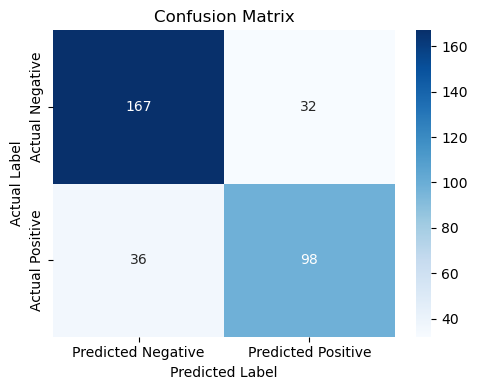

AUC-ROC:  -0.7264681617040426


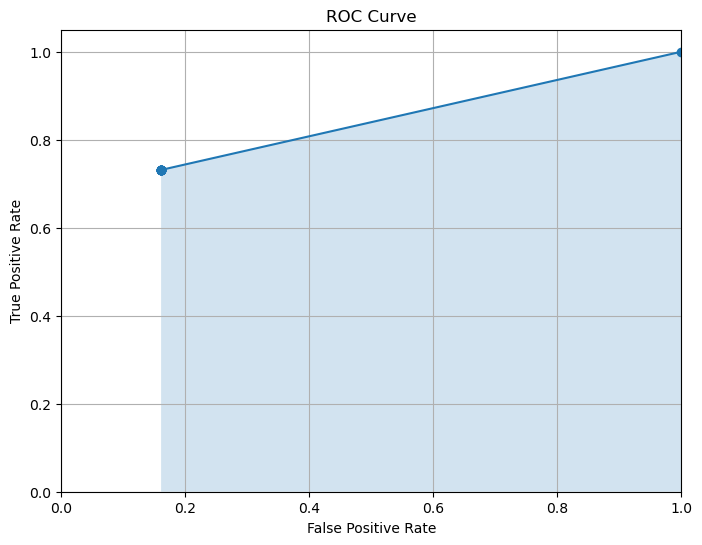

AUC-PR:  -0.15531697024234337
curve ROC:  ([1.0, 0.16080402010050251, 0.16080402010050251, 0.16080402010050251, 0.16080402010050251, 0.16080402010050251, 0.16080402010050251, 0.16080402010050251, 0.16080402010050251, 0.16080402010050251, 0.16080402010050251], [1.0, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896])


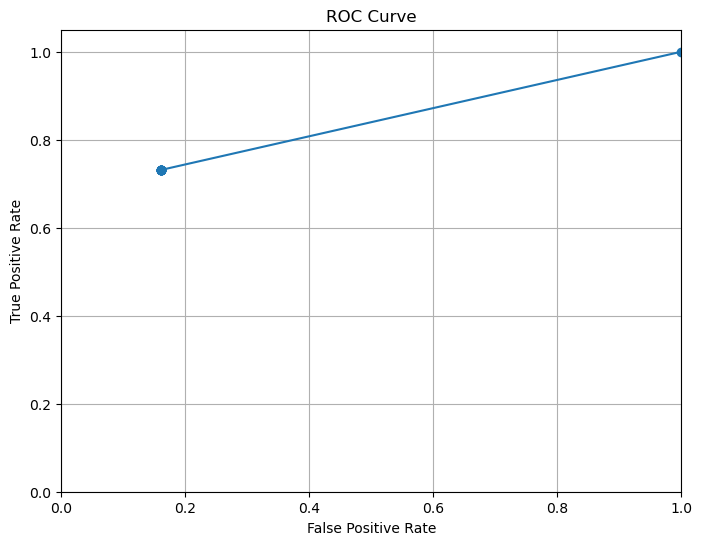

curve precision recall:  ([0.4024024024024024, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538], [1.0, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896])


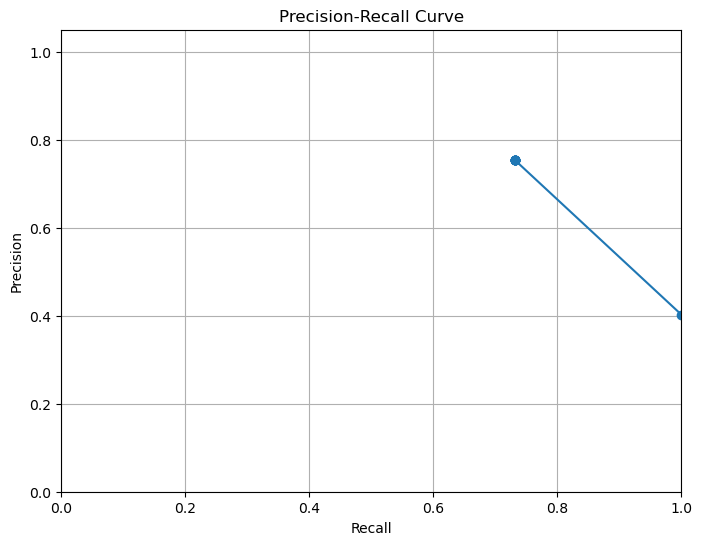

In [12]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)

X_train, y_train, features = pp.df_breakDown(train_data, y='Diagnosis')
X_val, y_val, _ = pp.df_breakDown(val_data, y='Diagnosis')

# print("Distribución de Diagnosis en train:")
# print(X_train_fold['Diagnosis'].value_counts())

X_train = pp.normalization(X_train, X_train.mean(), X_train.std())
X_val = pp.normalization(X_val, X_train.mean(), X_train.std())

model = mod.Logistic_Regression(X_train, y_train, features, 0, 0.5)
model_val = model.predict(X_val)
print(model.coef)

print("Fscore: ", met.f_score(y_val, model_val))
print("Precision: ", met.precision(y_val, model_val))
print("Recall: ", met.recall(y_val, model_val))
print("Accuracy: ", met.accuracy(y_val, model_val))
TP, TN, FP, FN = met.confusion_matrix(y_val, model_val)
print("TP: ", TP, "\nTN: ", TN, "\nFP: ", FP, "\nFN: ", FN)
met.draw_confusion_matrix(TP, TN, FP, FN)
print("AUC-ROC: ", met.AUC_ROC(y_val, model_val))
met.draw_AUC_ROC(y_val, model_val)
print("AUC-PR: ", met.AUC_PR(y_val, model_val))
print("curve ROC: ", met.curve_ROC(y_val, model_val))
met.draw_ROC_curve(y_val, model_val)
print("curve precision recall: ", met.curve_precision_recall(y_val, model_val))
met.draw_precision_recall_curve(y_val, model_val)